## Imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_data = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')

In [5]:
train_data.head(10)

,Throughput(t),Grind(%),Feed Grade(g/t),"Density, %",pH,Cyanide conc.ppm,DO ppm,"Carbon, g/l","Average Carbon Loading, g/t",Recovery(%)
0,23532,75.425000,1.033727,55,11.11,240,4.59,14.5,2371.3925,87.961187
1,26178,75.380000,1.272648,53,11.50,260,6.11,9.0,1770.9075,88.565905
2,24249,74.944999,1.890157,53,11.70,250,7.24,4.5,2560.3400,90.986610
3,25019,80.470000,1.781301,54,11.55,250,5.37,8.0,1620.8250,91.640657
4,25093,76.775000,1.822692,53,11.89,240,6.49,15.5,1412.7750,91.081881
5,21646,77.905000,1.487579,54,10.76,250,5.59,12.5,2163.6000,89.832310
6,24547,76.609999,1.701884,58,10.86,230,7.49,13.0,2032.8300,91.594430
7,21737,80.204999,1.896136,54,10.77,260,6.28,12.5,2289.1625,90.492627
8,24871,77.755001,1.622237,56,10.94,240,8.77,9.0,2251.2725,91.337506
9,18403,85.109998,1.108000,53,10.08,230,7.36,10.5,2148.4700,90.651737


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Throughput(t)                117 non-null    int64  
 1   Grind(%)                     117 non-null    float64
 2   Feed Grade(g/t)              117 non-null    float64
 3   Density, %                   117 non-null    int64  
 4   pH                           117 non-null    float64
 5   Cyanide conc.ppm             117 non-null    int64  
 6   DO ppm                       117 non-null    float64
 7   Carbon, g/l                  117 non-null    float64
 8   Average Carbon Loading, g/t  117 non-null    float64
 9   Recovery(%)                  117 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 9.3 KB


In [9]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Throughput(t),117.0,23607.290598,3316.703206,11149.000000,22106.000000,24216.000000,25754.000000,28737.000000
Grind(%),117.0,76.752477,3.366745,68.915000,74.944999,76.350002,77.905000,91.270000
Feed Grade(g/t),117.0,1.684791,0.391633,0.979182,1.386267,1.669002,1.960919,2.623004
"Density, %",117.0,53.333333,1.377153,49.000000,53.000000,53.000000,54.000000,58.000000
pH,117.0,11.200085,0.566995,9.770000,10.870000,11.130000,11.490000,12.950000
Cyanide conc.ppm,117.0,251.965812,43.256240,140.000000,240.000000,250.000000,260.000000,510.000000
DO ppm,117.0,6.380342,1.614310,1.120000,5.420000,6.450000,7.460000,11.170000
"Carbon, g/l",117.0,11.158120,10.178080,1.500000,6.000000,9.500000,14.000000,100.000000
"Average Carbon Loading, g/t",117.0,2102.836182,648.806863,964.362500,1683.780017,2020.875000,2354.897500,4988.560000
Recovery(%),117.0,90.138691,1.189676,86.551251,89.415611,90.372695,90.988597,92.159325


In [10]:
train_data.corr()

,Throughput(t),Grind(%),Feed Grade(g/t),"Density, %",pH,Cyanide conc.ppm,DO ppm,"Carbon, g/l","Average Carbon Loading, g/t",Recovery(%)
Throughput(t),1.000000,-0.450325,-0.001044,0.201891,0.190731,0.099401,0.096988,-0.171022,0.001597,-0.267825
Grind(%),-0.450325,1.000000,-0.132355,-0.135397,-0.049636,-0.053756,0.004787,-0.163560,0.167332,0.242086
Feed Grade(g/t),-0.001044,-0.132355,1.000000,0.208918,-0.012225,-0.072826,-0.016064,0.022356,0.244246,0.445358
"Density, %",0.201891,-0.135397,0.208918,1.000000,-0.073455,0.117701,-0.215884,0.036184,0.109845,0.136912
pH,0.190731,-0.049636,-0.012225,-0.073455,1.000000,0.180413,-0.236728,-0.075896,-0.072010,-0.188075
Cyanide conc.ppm,0.099401,-0.053756,-0.072826,0.117701,0.180413,1.000000,-0.174846,0.032183,0.089859,-0.013874
DO ppm,0.096988,0.004787,-0.016064,-0.215884,-0.236728,-0.174846,1.000000,-0.108343,-0.243630,0.268856
"Carbon, g/l",-0.171022,-0.163560,0.022356,0.036184,-0.075896,0.032183,-0.108343,1.000000,-0.255048,0.024909
"Average Carbon Loading, g/t",0.001597,0.167332,0.244246,0.109845,-0.072010,0.089859,-0.243630,-0.255048,1.000000,-0.323187
Recovery(%),-0.267825,0.242086,0.445358,0.136912,-0.188075,-0.013874,0.268856,0.024909,-0.323187,1.000000


<Axes: >

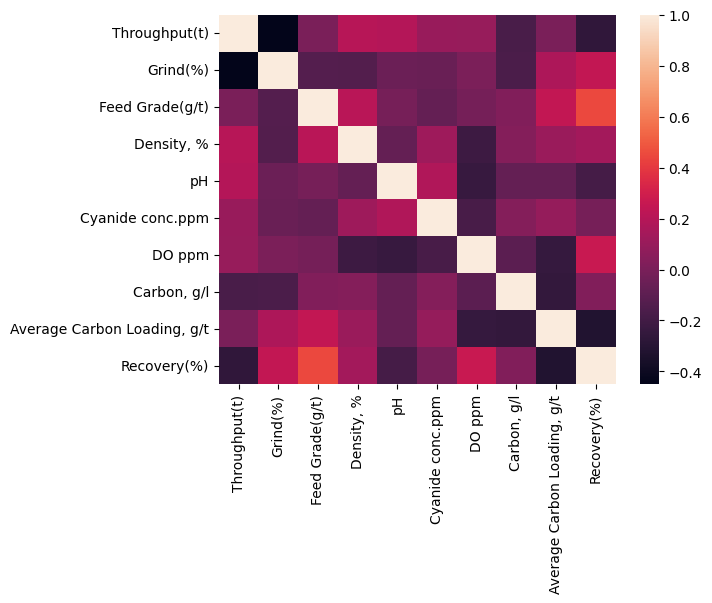

In [12]:
sns.heatmap(train_data.corr())

In [13]:
train_data.corr()['Recovery(%)']

Throughput(t)                 -0.267825
Grind(%)                       0.242086
Feed Grade(g/t)                0.445358
Density, %                     0.136912
pH                            -0.188075
Cyanide conc.ppm              -0.013874
DO ppm                         0.268856
Carbon, g/l                    0.024909
Average Carbon Loading, g/t   -0.323187
Recovery(%)                    1.000000
Name: Recovery(%), dtype: float64

In [37]:
input_features = train_data.columns.to_list()[:9]
target_feature = train_data.columns.to_list()[-1]
input_features, target_feature

(['Throughput(t)',
  'Grind(%)',
  'Feed Grade(g/t)',
  'Density, %',
  'pH',
  'Cyanide conc.ppm',
  'DO ppm',
  'Carbon, g/l',
  'Average Carbon Loading, g/t'],
 'Recovery(%)')

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


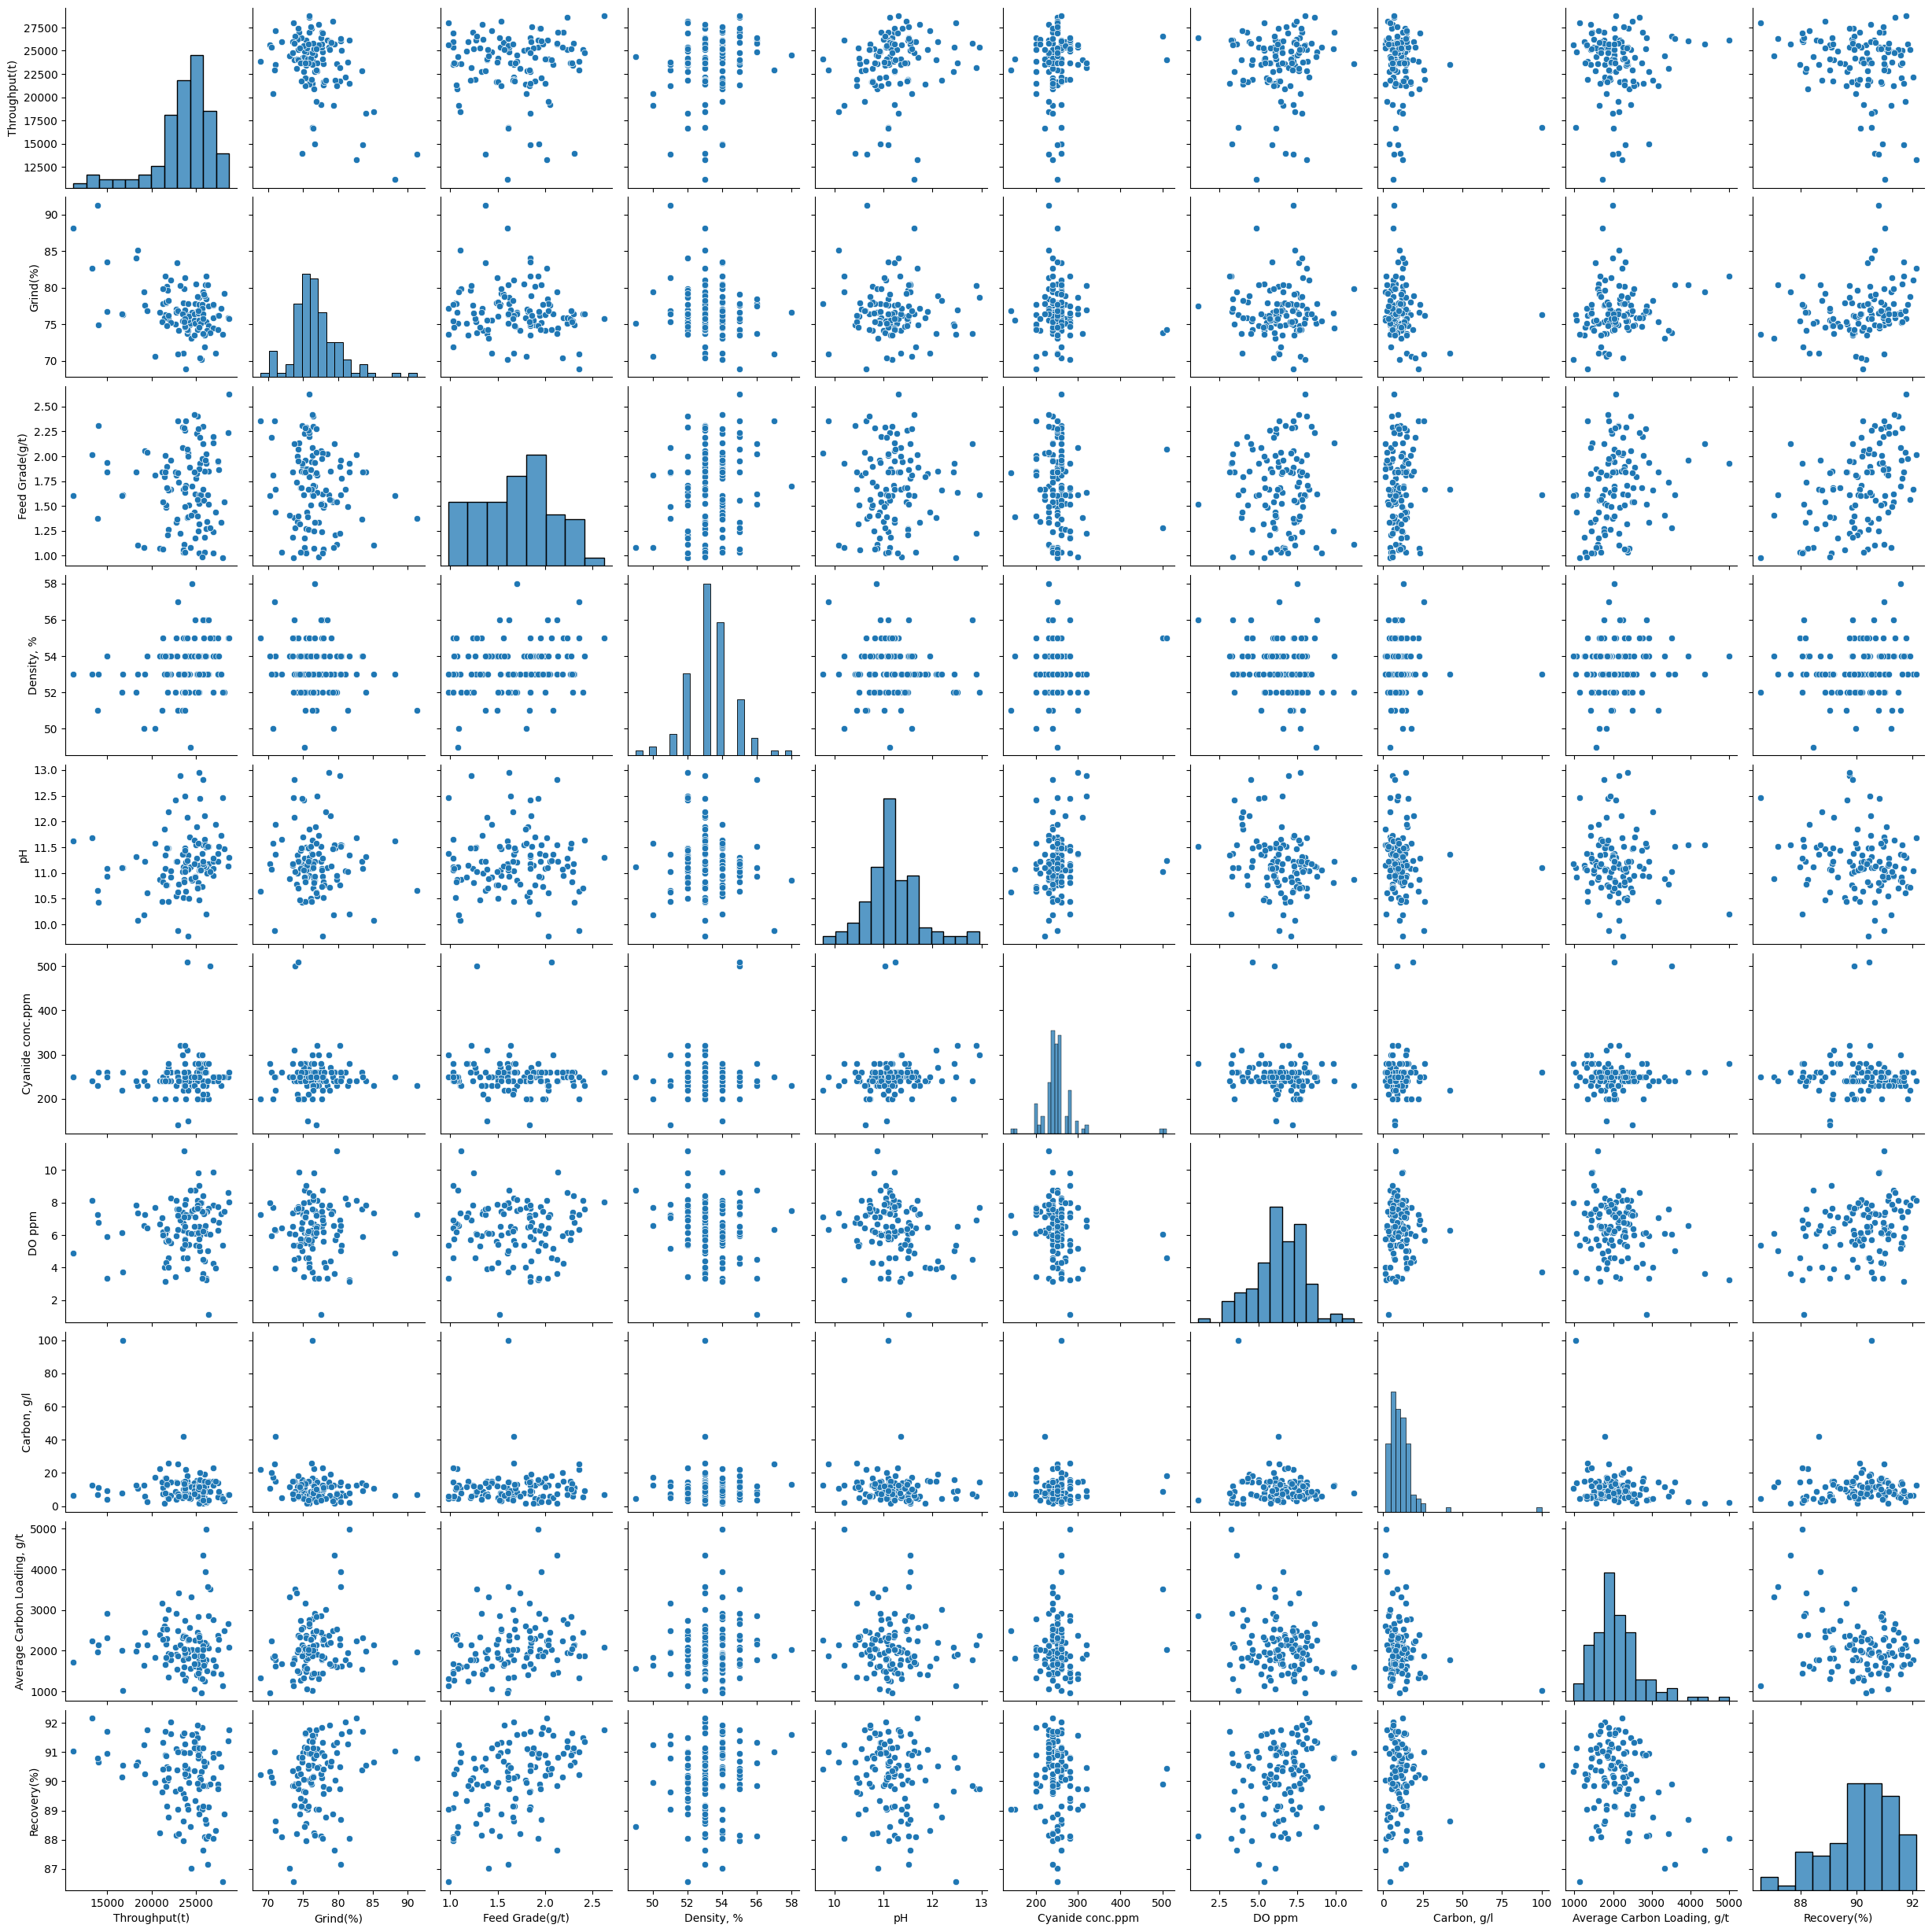

In [40]:
sns.pairplot(data=train_data)